<h3><b>Task_2: Implement an image color detector which identifies all the colors in an image</b></h3>

In this notebook, I will use KMeans to identify colors from a given image. 

## <h3>Import libraries</h3>
For this work, I need sklearn for KMeans algorithm, opencv for image manipulation, numpy to work with arrays and matplotlib.pyplot for plotting graphs.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
import os

%matplotlib inline

In [2]:
import cv2

## <h4>Reading the input image and conversion of its colors to different colour scales</h4>


The type of this input is <class 'numpy.ndarray'>
Shape; (360, 640, 3)


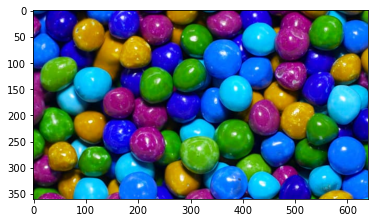

In [3]:
# read the input image
image = cv2.imread('images/img.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape; {}".format(image.shape))
plt.imshow(image)

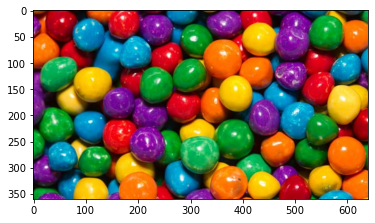

In [4]:
# convert image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

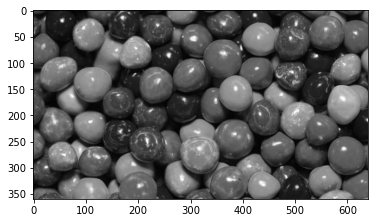

In [5]:
# convert image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Color Identification

In [6]:
# load image and convert it to RGB
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
# define a function that will convert RGB to hex (get labels color for the output pie chart)
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
# color identification method
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize=(10,20))
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.title("Color Identification", fontsize=25)
        return rgb_colors

[array([  8.0577491 ,  44.40755008, 138.66156266]),
 array([251.81269282, 252.18396288, 251.69979001]),
 array([242.27517596,   8.82328324,  20.40505992]),
 array([247.88103463, 211.08165645,  13.93470939]),
 array([  5.7513787 , 157.13070669, 216.02666439]),
 array([ 14.98997737, 178.3102705 ,  35.66558896]),
 array([4.31815458, 3.60155782, 4.55997603]),
 array([  3.96260318, 142.90990538,  75.87613247]),
 array([ 77.18700136, 141.24956217, 200.4817085 ]),
 array([127.39027694,  41.90818784,  50.09557495]),
 array([197.58413775, 126.44847378, 107.75919645]),
 array([  4.45404172,  52.50293351, 213.66688396]),
 array([208.49940382, 200.90639905, 204.81895866]),
 array([243.12607573, 140.39522375,   8.65512048]),
 array([221.37381768,  30.95644277,  44.04547635])]

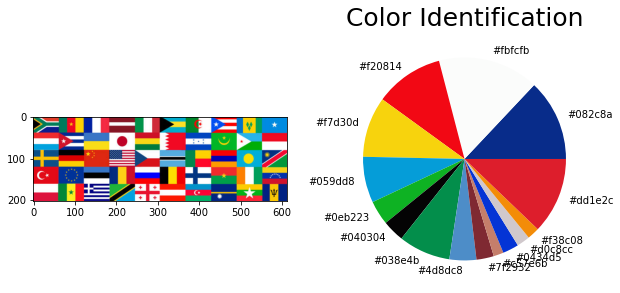

In [19]:
image_Path='images/img11.jpg'
get_colors(get_image(image_Path), 15, True)

In [20]:
# color identification for a set of images in specific directory
IMAGE_DIRECTORY = r'images'
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

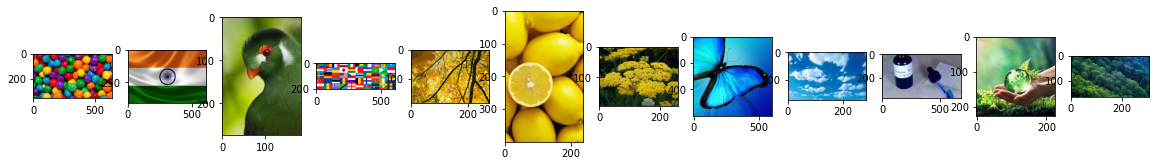

In [21]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [24]:
def show_colors(images):
    index = 1
    
    for i in range(len(images)):
        get_colors(images[i], 10, True)

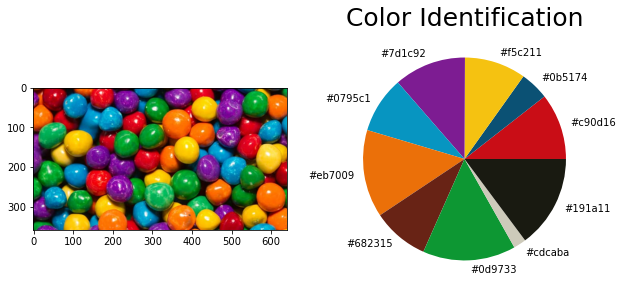

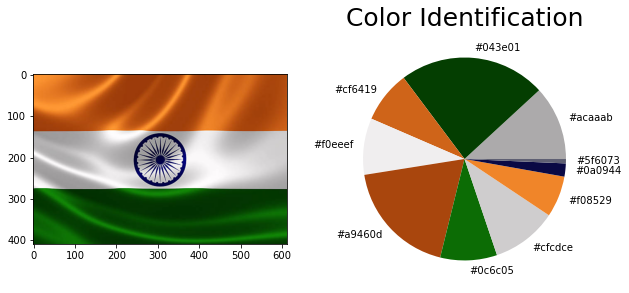

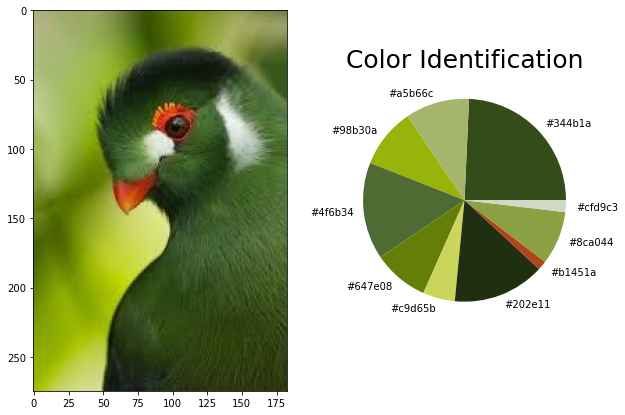

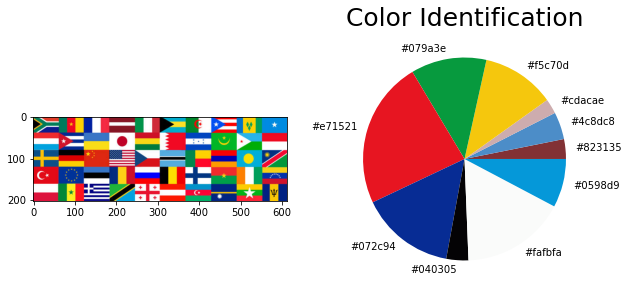

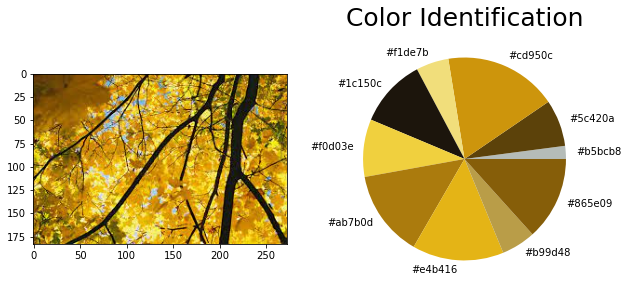

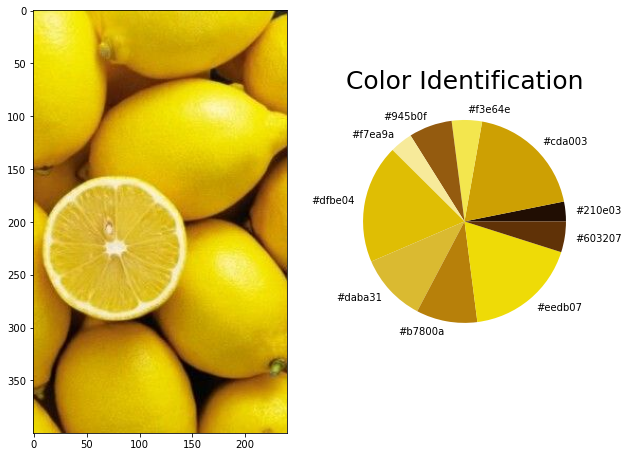

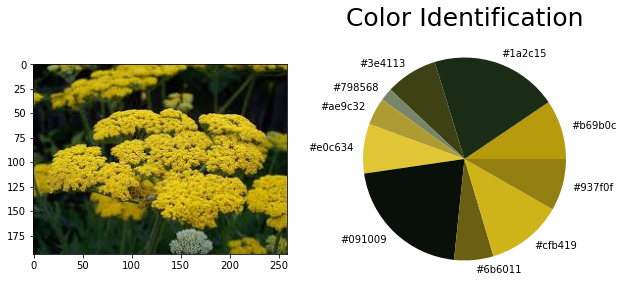

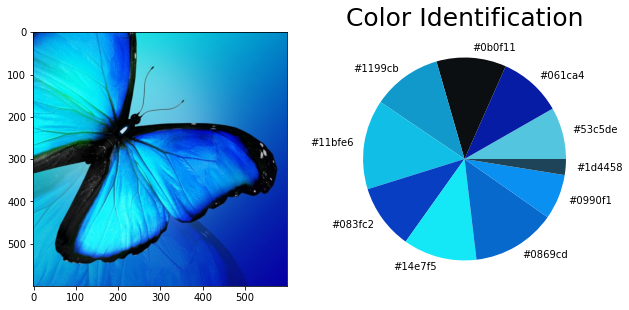

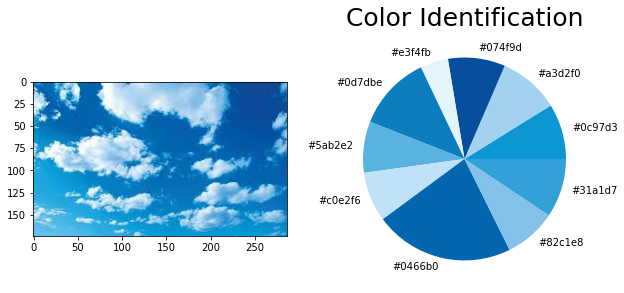

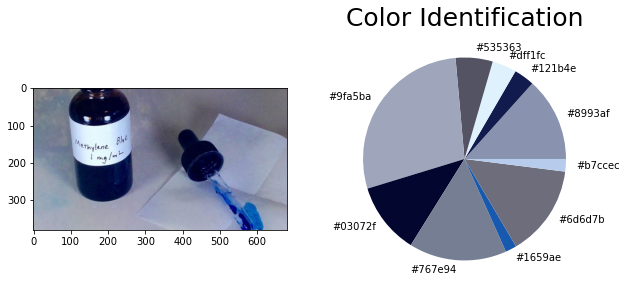

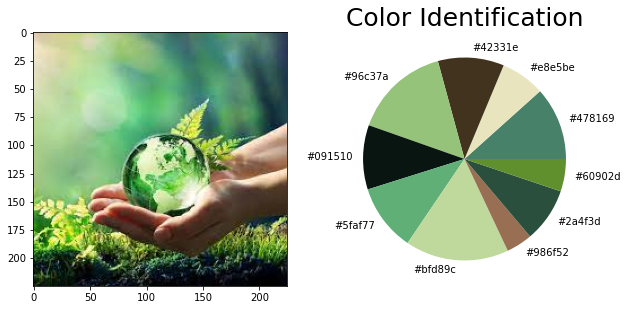

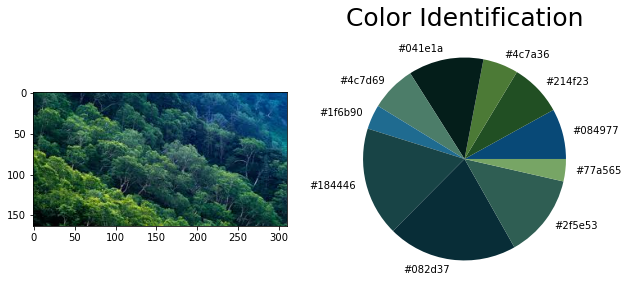

In [25]:
show_colors(images)